In [2]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)  #The findFiles function uses glob.glob to find files matching a specified pattern.

print(findFiles('data.zip'))
!unzip data.zip

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):   #The unicodeToAscii function converts Unicode strings to ASCII, removing diacritics and non-ASCII characters.
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) #Normalization form decomposition
        if unicodedata.category(c) != 'Mn' #The list comprehension filters out characters that are diacritical marks
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n') #The file is opened with UTF-8 encoding, read into a single string, stripped of leading and trailing whitespace, and split into lines.
    return [unicodeToAscii(line) for line in lines]  #returns the lines in ASCII format.

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)


['data.zip']
Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  
Slusarski


In [3]:
all_categories

['English',
 'Arabic',
 'Korean',
 'Polish',
 'Irish',
 'Greek',
 'Portuguese',
 'German',
 'Japanese',
 'Chinese',
 'Dutch',
 'Russian',
 'Italian',
 'Vietnamese',
 'Spanish',
 'Czech',
 'Scottish',
 'French']

In [4]:
category_lines

{'English': ['Abbas',
  'Abbey',
  'Abbott',
  'Abdi',
  'Abel',
  'Abraham',
  'Abrahams',
  'Abrams',
  'Ackary',
  'Ackroyd',
  'Acton',
  'Adair',
  'Adam',
  'Adams',
  'Adamson',
  'Adanet',
  'Addams',
  'Adderley',
  'Addinall',
  'Addis',
  'Addison',
  'Addley',
  'Aderson',
  'Adey',
  'Adkins',
  'Adlam',
  'Adler',
  'Adrol',
  'Adsett',
  'Agar',
  'Ahern',
  'Aherne',
  'Ahmad',
  'Ahmed',
  'Aikman',
  'Ainley',
  'Ainsworth',
  'Aird',
  'Airey',
  'Aitchison',
  'Aitken',
  'Akhtar',
  'Akram',
  'Alam',
  'Alanson',
  'Alber',
  'Albert',
  'Albrighton',
  'Albutt',
  'Alcock',
  'Alden',
  'Alder',
  'Aldersley',
  'Alderson',
  'Aldred',
  'Aldren',
  'Aldridge',
  'Aldworth',
  'Alesbury',
  'Alexandar',
  'Alexander',
  'Alexnader',
  'Alford',
  'Algar',
  'Ali',
  'Alker',
  'Alladee',
  'Allam',
  'Allan',
  'Allard',
  'Allaway',
  'Allcock',
  'Allcott',
  'Alldridge',
  'Alldritt',
  'Allen',
  'Allgood',
  'Allington',
  'Alliott',
  'Allison',
  'Allkins'

In [5]:
print(category_lines['Italian'][:5])


['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [148]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.

In [174]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size,output_size):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.i2h = nn.Parameter(torch.randn(self.hidden_size, self.input_size))
        self.h2h = nn.Parameter(torch.randn(self.hidden_size, self.hidden_size))
        self.h2o = nn.Parameter(torch.randn(self.output_size, self.hidden_size))
        self.bias_h = nn.Parameter(torch.zeros(self.hidden_size))
        self.bias_o = nn.Parameter(torch.zeros(self.output_size))
    def forward(self,input,hidden,time_steps=1):
        if not torch.is_tensor(input) or not torch.is_tensor(hidden):
          raise ValueError("input and hidden states should be pytorch tensors")
        input = input.view(-1,self.input_size)

        hidden = torch.tanh(input @ self.i2h.t() + hidden @ self.h2h.t() + self.bias_h)
        output = F.log_softmax(hidden @ self.h2o.t() + self.bias_o,dim=1)

        return output , hidden
    def initHidden(self, batch_size=1):
        return torch.zeros(batch_size, self.hidden_size)

input_size = n_letters
hidden_size = 8
n_hidden = hidden_size
output_size = n_categories
rnn = RNN(input_size, hidden_size, output_size)










In [175]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)
print(next_hidden)

tensor([[-4.6429, -4.1077, -6.6016, -3.2956, -5.2476, -8.2538, -2.6861, -2.9127,
         -4.8095, -7.6636, -5.7543, -0.7616, -4.1249, -5.3207, -3.1978, -1.9695,
         -4.7224, -2.1328]], grad_fn=<LogSoftmaxBackward0>)
tensor([[ 0.9186,  0.0738, -0.5088,  0.6854,  0.2039, -0.4573,  0.9290,  0.6390]],
       grad_fn=<TanhBackward0>)


In [176]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-4.6429, -4.1077, -6.6016, -3.2956, -5.2476, -8.2538, -2.6861, -2.9127,
         -4.8095, -7.6636, -5.7543, -0.7616, -4.1249, -5.3207, -3.1978, -1.9695,
         -4.7224, -2.1328]], grad_fn=<LogSoftmaxBackward0>)


In [156]:
def categoryFromOutput(output):
    # Get the top category index from the model's output
    top_n, top_i = output.topk(1)  # Returns the highest value and its index
    category_i = top_i[0].item()   # Convert the top index tensor to a Python integer
    return all_categories[category_i], category_i  # Return the category name and its index

# Example usage: print the category name and index for the given output
print(categoryFromOutput(output))


('French', 17)


In [157]:
import random

# Function to choose a random element from a list ``l``
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Function to create a random training example
def randomTrainingExample():
    # Choose a random category (language)
    category = randomChoice(all_categories)

    # Choose a random line (name) from the chosen category
    line = randomChoice(category_lines[category])

    # Create a tensor for the category (as an index in all_categories)
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)

    # Convert the line to a tensor using the lineToTensor function
    line_tensor = lineToTensor(line)

    # Return the category, line, and their respective tensors
    return category, line, category_tensor, line_tensor

# Loop to print 10 random training examples
for i in range(10):
    # Get a random training example
    category, line, category_tensor, line_tensor = randomTrainingExample()

    # Print the category and line
    print('category =', category, '/ line =', line)


category = Irish / line = Whelan
category = Vietnamese / line = Dam
category = Japanese / line = Tsukioka
category = Arabic / line = Sayegh
category = Italian / line = Paternoster
category = Arabic / line = Antar
category = Arabic / line = Awad
category = German / line = Kunkel
category = Czech / line = Koma
category = English / line = Robson


In [158]:
criterion = nn.NLLLoss()

In [159]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate (this is done instead of optimizer.step())
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [177]:
import time
import math

# Number of iterations to train
n_iters = 100000

# Print progress every ``print_every`` iterations
print_every = 5000

# Record loss for plotting every ``plot_every`` iterations
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

# Function to calculate the elapsed time since ``since`` in minutes and seconds
def timeSince(since):
    now = time.time()  # Current time
    s = now - since  # Elapsed time in seconds
    m = math.floor(s / 60)  # Convert seconds to minutes
    s -= m * 60  # Remaining seconds after converting to minutes
    return '%dm %ds' % (m, s)  # Format as "Xm Ys"

start = time.time()  # Record the start time

for iter in range(1, n_iters + 1):
    # Get a random training example: category, line, and their tensor representations
    category, line, category_tensor, line_tensor = randomTrainingExample()

    # Train the model on the example and get the output and loss
    output, loss = train(category_tensor, line_tensor)

    current_loss += loss  # Accumulate the loss

    # Print ``iter`` number, loss, name and guess every ``print_every`` iterations
    if iter % print_every == 0:
        # Get the model's guess and the index of the guessed category
        guess, guess_i = categoryFromOutput(output)

        # Check if the guess is correct
        correct = '✓' if guess == category else '✗ (%s)' % category

        # Print iteration number, progress, elapsed time, loss, input line, guessed category, and correctness
        print('%d %d%% (%s) %.4f %s / %s %s' % (
            iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss average to the list of losses every ``plot_every`` iterations
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)  # Average loss over the last ``plot_every`` iterations
        current_loss = 0  # Reset current loss


5000 5% (0m 7s) 2.7587 Uchiyama / German ✗ (Japanese)
10000 10% (0m 15s) 2.4968 Vuu / Chinese ✗ (Vietnamese)
15000 15% (0m 23s) 3.4869 Bonfils / Greek ✗ (French)
20000 20% (0m 30s) 2.8996 Korandak / Dutch ✗ (Czech)
25000 25% (0m 38s) 2.2848 Lieu / Korean ✗ (Vietnamese)
30000 30% (0m 45s) 2.0583 Medeiros / Greek ✗ (Portuguese)
35000 35% (0m 53s) 2.7418 Klineberg / English ✗ (Czech)
40000 40% (1m 1s) 1.6854 Toshusai / Polish ✗ (Japanese)
45000 45% (1m 8s) 1.5566 Bukoski / Italian ✗ (Polish)
50000 50% (1m 16s) 1.7458 Wyrick / Polish ✓
55000 55% (1m 23s) 4.4749 Hudolei / Italian ✗ (Russian)
60000 60% (1m 31s) 2.4134 Lucey / Scottish ✗ (English)
65000 65% (1m 39s) 2.9679 Kassis / Greek ✗ (Arabic)
70000 70% (1m 46s) 2.1700 Senft / Scottish ✗ (German)
75000 75% (1m 54s) 0.0952 Paramonov / Russian ✓
80000 80% (2m 2s) 1.5236 Kosmatka / Portuguese ✗ (Polish)
85000 85% (2m 9s) 2.0649 Tocher / Scottish ✗ (English)
90000 90% (2m 17s) 2.2874 Ustohal / Russian ✗ (Czech)
95000 95% (2m 24s) 0.9260 Ying

<ipython-input-173-00c85b34ed22>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)  # Set x-axis labels with rotation
<ipython-input-173-00c85b34ed22>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)  # Set y-axis labels


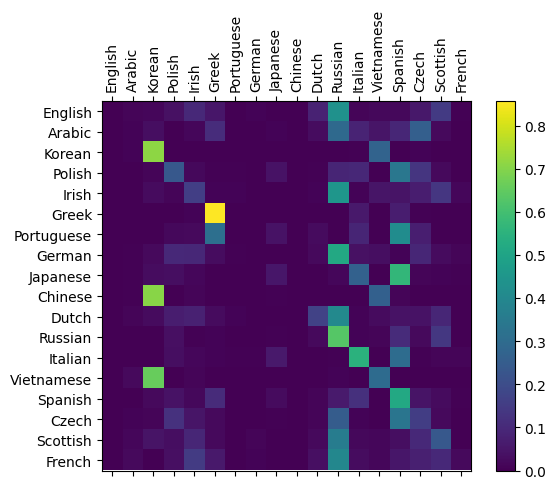

In [173]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)  # Initialize an empty confusion matrix
n_confusion = 10000  # Number of examples to evaluate for the confusion matrix

import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import matplotlib.ticker as ticker  # Importing ticker for customizing ticks

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()  # Initialize the hidden state

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)  # Pass each character in the line through the RNN

    return output  # Return the final output of the RNN

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()  # Get a random training example
    output = evaluate(line_tensor)  # Evaluate the line tensor
    guess, guess_i = categoryFromOutput(output)  # Get the guessed category and its index
    category_i = all_categories.index(category)  # Get the true category index
    confusion[category_i][guess_i] += 1  # Increment the corresponding cell in the confusion matrix

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()  # Normalize each row

# Set up plot
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111)  # Add a subplot to the figure
cax = ax.matshow(confusion.numpy())  # Display the confusion matrix as an image
fig.colorbar(cax)  # Add a color bar to the figure

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)  # Set x-axis labels with rotation
ax.set_yticklabels([''] + all_categories)  # Set y-axis labels

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set x-axis major ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))  # Set y-axis major ticks
plt.show()  # Show the plot

In [146]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


In [147]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.33) Czech
(-1.47) Polish
(-2.10) Scottish

> Jackson
(-1.42) Irish
(-1.49) German
(-2.20) Scottish

> Satoshi
(-0.42) Italian
(-2.22) Czech
(-2.53) Polish
